In [1]:
# add tag 'ignore_cell' to not include cell in README

In [2]:
try:
    import dice_calc
except:
    print('module not installed')
    print('Did you activate the local environment?')
    print('Did you run `pip install -e . --config-settings editable_mode=strict` in the root directory?')

In [3]:
from dice_calc import settings_set, settings_reset
settings_reset()
settings_set('DEFAULT_OUTPUT_WIDTH',  80) 

# PythonDice
This is a python package that includes a simple to use and powerful dice probability engine. 

This package offers features and capabilities to calculate probabilities of arbitrary dice scripts including full capabilities of `anydice.com`. 

Additionaly, this package includes the first* custom built compiler that translates any** valid `anydice.com` code into runnable python code.

This project is still in early development but everything mentioned above is complete. (project started October 2024)

\* as far as we know

\*\* except very rare edge cases (e.g. using numbers >$2^{53}$ causing `anydice` to potentially perform incorrect/different calculations) mentioned at the end for transparency.

# Features

1. Ability to compile and run any `anydice` script **directly and locally in python** with a single function call.
   * Of course, this means that all operations and functions that are available in `anydice` are available in this package.

2. Ability to write scripts that combine the complexity of the `anydice` language with the power of Python (built-in libraries such as `itertools`, custom classes, etc.).

3. Very light-weight pure Python implementation with zero dependencies. Using this package requires no other modules. 

4. Package is actively maintained (as of October 2024) and we welcome all new issues/questions/feedback/suggestions

# Installation

`pip install dice-calc`

This package has no dependencies. Requires `Python >= 3.9`

# Basic Usage

If you are familiar with the `anydice.com` language then you should skip to section `compiling anydice.com code` which automatically converts the provided `anydice` code to this packages code thus teaching you all the nuances of this package.

The examples below are **not comprehensive at all**. They just show very basic use cases of our package.

### Example #1: 
Let's roll a single d20 dice (a d20 is a regular twenty sided-die)

In [4]:
from dice_calc import roll, output
X = roll(20)
output(X)

10.5 ± 5.77
 1:  5.00  ████
 2:  5.00  ████
 3:  5.00  ████
 4:  5.00  ████
 5:  5.00  ████
 6:  5.00  ████
 7:  5.00  ████
 8:  5.00  ████
 9:  5.00  ████
10:  5.00  ████
11:  5.00  ████
12:  5.00  ████
13:  5.00  ████
14:  5.00  ████
15:  5.00  ████
16:  5.00  ████
17:  5.00  ████
18:  5.00  ████
19:  5.00  ████
20:  5.00  ████
----------------------------------------------------------------------------------------


The numbers on the first line are the mean and std.

### Example #2
Let's roll two d6 dice (a d6 is a regular six sided-die)

In [5]:
from dice_calc import roll, output
X = roll(2, 6)  # or roll(6) + roll(6)
output(X)

7.0 ± 2.42
 2:  2.78  ██
 3:  5.56  ████
 4:  8.33  ██████
 5: 11.11  █████████
 6: 13.89  ███████████
 7: 16.67  █████████████
 8: 13.89  ███████████
 9: 11.11  █████████
10:  8.33  ██████
11:  5.56  ████
12:  2.78  ██
----------------------------------------------------------------------------------------


### Example #3

What about rolling a D20 plus a D6?

In [6]:
from dice_calc import roll, output
X = roll(20) + roll(6)
output(X)

14.0 ± 6.01
 2:  0.83  █
 3:  1.67  █
 4:  2.50  ██
 5:  3.33  ███
 6:  4.17  ███
 7:  5.00  ████
 8:  5.00  ████
 9:  5.00  ████
10:  5.00  ████
11:  5.00  ████
12:  5.00  ████
13:  5.00  ████
14:  5.00  ████
15:  5.00  ████
16:  5.00  ████
17:  5.00  ████
18:  5.00  ████
19:  5.00  ████
20:  5.00  ████
21:  5.00  ████
22:  4.17  ███
23:  3.33  ███
24:  2.50  ██
25:  1.67  █
26:  0.83  █
----------------------------------------------------------------------------------------


### Example #4
What about the probability distribution of rolling two D20's with advantage (i.e. rolling two D20's and taking the highest number)

In [7]:
from dice_calc import roll, output
X = 1 @ roll(2, 20)
output(X)

13.82 ± 4.71
 1:  0.25  
 2:  0.75  █
 3:  1.25  █
 4:  1.75  █
 5:  2.25  ██
 6:  2.75  ██
 7:  3.25  ███
 8:  3.75  ███
 9:  4.25  ███
10:  4.75  ████
11:  5.25  ████
12:  5.75  ████
13:  6.25  █████
14:  6.75  █████
15:  7.25  ██████
16:  7.75  ██████
17:  8.25  ██████
18:  8.75  ███████
19:  9.25  ███████
20:  9.75  ████████
----------------------------------------------------------------------------------------


### Example #5
Let's try a slightly more complex example. 

Rolling a D20 with advantage + two D6's + 5

In [8]:
from dice_calc import roll, output
D20_adv = 1 @ roll(2, 20)
two_D6 = roll(2, 6)
result = D20_adv + two_D6 + 5
output(result)

25.82 ± 5.29
 8:  0.01  
 9:  0.03  
10:  0.10  
11:  0.21  
12:  0.38  
13:  0.63  
14:  0.96  █
15:  1.35  █
16:  1.78  █
17:  2.26  ██
18:  2.75  ██
19:  3.25  ███
20:  3.75  ███
21:  4.25  ███
22:  4.75  ████
23:  5.25  ████
24:  5.75  ████
25:  6.25  █████
26:  6.75  █████
27:  7.25  ██████
28:  7.47  ██████
29:  7.38  ██████
30:  6.99  █████
31:  6.26  █████
32:  5.20  ████
33:  3.78  ███
34:  2.57  ██
35:  1.57  █
36:  0.80  █
37:  0.27  
----------------------------------------------------------------------------------------


### getting evaluated results (roller)

Any RV object (dice / random variable) can be rolled using the `rolled` function.

In [9]:
from dice_calc import roll, roller
X = 1 @ roll(2, 20)  # rolls a d20 with advantage
roller(X)  # gets a random value from rolling a d20 with advantage

7

### Complex Example:

Let's try calculating the total damage of the following attack on a boss in an RPG: 
- TO HIT: 1d20 + 7 against 22 AC (less than 22 is a miss. rolling a 20 is a CRITICAL so double the damage die)
- DAMAGE: 2d8 + 4 blunt damange 
- \+ 1d4 thunder damage
- \+ 1d10 + 3 radiant damange (half damage if the target succeeds a 16 DC wisdom saving throw, boss has +5 wis saving throw)

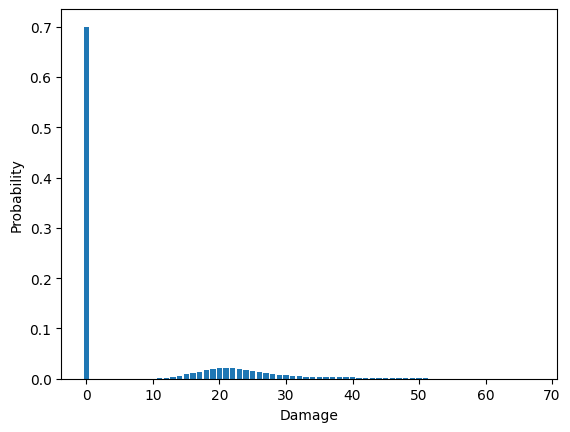

In [10]:
from dice_calc import roll, anydice_casting

@anydice_casting()
def calculate(to_hit_roll: int, save_roll: int):  # type hinting as int REQUIRED!!!
    if to_hit_roll + 7 < 22:  # miss
        return 0
    is_crit = (to_hit_roll == 20)
    dmg_die_mult = 2 if is_crit else 1
    blung_dmg = roll(2 * dmg_die_mult, 8) + 4
    thund_dmg = roll(1 * dmg_die_mult, 4)
    radiant_dmg = roll(1 * dmg_die_mult, 10) + 3
    if save_roll + 5 >= 16:  # save success
        radiant_dmg = radiant_dmg // 2
    return blung_dmg + thund_dmg + radiant_dmg


X = calculate(roll(20), roll(20))

# plotting code
from matplotlib import pyplot as plt
vals, probs = zip(*X.get_vals_probs())
plt.bar(vals, probs); plt.xlabel('Damage'); plt.ylabel('Probability');

Notice how we used the decorator `@anydice_casting` to use `if` conditions on dice inside of a custom function. Typehinting the input to `int` is required, the engine knows that you want to calculate the function many times based on all possible combinations of the input random variable.

The three valid typehints that the decorator `@anydice_casting` looks for are `: int`, `: Seq`, `: RV` which are equivelant to the 3 types `:n`, `:s`, and `:d` respectively in `anydice`. The casting done by `@anydice_casting` is exactly how casting is done in the `anydice` language. For more info on that please read the [documentation `functions -> Parameter types` in the `anydice` docs](https://anydice.com/docs/functions/) .

Note: `Seq` and `RV` are imported from `dice_calc.randvar`

# Getting probabilities as dict 

In [11]:
from dice_calc import roll
X = 1 @ roll(2, 20)  # D20 with advantage
pdf = dict(X.get_vals_probs())
print(pdf)

{1: 0.0025, 2: 0.0075, 3: 0.0125, 4: 0.0175, 5: 0.0225, 6: 0.0275, 7: 0.0325, 8: 0.0375, 9: 0.0425, 10: 0.0475, 11: 0.0525, 12: 0.0575, 13: 0.0625, 14: 0.0675, 15: 0.0725, 16: 0.0775, 17: 0.0825, 18: 0.0875, 19: 0.0925, 20: 0.0975}


## plotting using matploblib


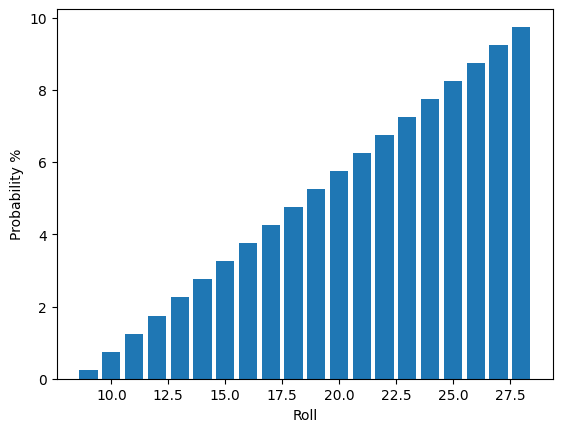

In [12]:
from dice_calc import roll
X = 1 @ roll(2, 20) + 8  # D20 with advantage + 8

# plotting code
from matplotlib import pyplot as plt
vals, probs = zip(*X.get_vals_probs())
percent = [p * 100 for p in probs]
plt.bar(vals, percent); plt.xlabel('Roll'); plt.ylabel('Probability %');

# compiling anydice.com code

[anydice](anydice.com) is a powerful and popular online dice calculater which inspired the creation of this package. Any* valid code from anydice can be converted to valid python code using this package in a single function call.

Below we take an example piece of code from the anydice articles [legend of the five rings](https://anydice.com/articles/legend-of-the-five-rings/).

We convert it using the function `compile_anydice` and then execute it using our package (p.s. don't forget to import all the library functions as we do below).

In [13]:
from dice_calc.parser import compile_anydice

EXAMPLE_CODE = """
function: convert SUM:n {
 if SUM >= 1000 {
  TENSROLLED: SUM / 1000
  result: SUM - TENSROLLED * 990 + TENSROLLED d [explode d10]
 }
 result: SUM
}

output [convert [highest 3 of 6d{1..9, 1000}]] named "6k3 exploded after keeping"
"""

code = compile_anydice(EXAMPLE_CODE)
print(code)

@max_func_depth()
@anydice_casting()
def convert_X(SUM: int):
  if SUM >= 1000:
    TENSROLLED = SUM // 1000
    return SUM - TENSROLLED * 990 + roll(TENSROLLED, explode_X(roll(10)))
  
  return SUM

output(convert_X(highest_X_of_X(3, roll(6, Seq([myrange(1, 9), 1000])))), named=f"6k3 exploded after keeping")



In [14]:
CLIP_AFTER = 35
def clip_print(*args, **kwargs):
    global CLIP_AFTER
    if CLIP_AFTER < 0:
        return
    sep = kwargs.get('sep', ' ')
    end = kwargs.get('end', '\n')
    output = sep.join(map(str, args)) + end
    cur_len = output.count('\n')
    if CLIP_AFTER > cur_len:
        print(*args, **kwargs)
        CLIP_AFTER -= cur_len
        return
    else:
        # last print, need to crop
        output_clipped = '\n'.join(output.split('\n')[:CLIP_AFTER])
        print(output_clipped, **kwargs)
        print('... output cropped ...')
        CLIP_AFTER = -1

import dice_calc
dice_calc.settings_set('DEFAULT_PRINT_FN', clip_print)

In [15]:
# IMPORT EVERYTHING
from dice_calc import *

# EXECUTE CODE FROM COMPILE_ANYDICE
@max_func_depth()
@anydice_casting()
def convert_X(SUM: int):
  if SUM >= 1000:
    TENSROLLED = SUM // 1000
    return SUM - TENSROLLED * 990 + roll(TENSROLLED, explode_X(roll(10)))
  
  return SUM

output(convert_X(highest_X_of_X(3, roll(6, Seq([myrange(1, 9), 1000])))), named=f"6k3 exploded after keeping")


6k3 exploded after keeping 26.53 ± 8.32
  3:  0.00  
  4:  0.00  
  5:  0.00  
  6:  0.01  
  7:  0.02  
  8:  0.04  
  9:  0.09  
 10:  0.17  
 11:  0.29  
 12:  0.48  
 13:  0.76  █
 14:  1.12  █
 15:  1.62  █
 16:  2.22  ██
 17:  2.92  ██
 18:  3.71  ███
 19:  4.55  ████
 20:  5.31  ████
 21:  6.00  █████
 22:  6.40  █████
 23:  6.51  █████
 24:  6.20  █████
 25:  5.61  ████
 26:  4.65  ████
 27:  3.78  ███
 28:  3.14  ██
 29:  3.45  ███
 30:  3.40  ███
 31:  3.32  ███
 32:  3.16  ██
 33:  2.93  ██
 34:  2.60  ██
 35:  2.21  ██
 36:  1.78  █
... output cropped ...


In [16]:
CLIP_AFTER = 35
dice_calc.randvar.settings_set('DEFAULT_PRINT_FN', clip_print)

Or you can do it all in one line

In [17]:
from dice_calc.parser import compile_anydice, _get_lib

EXAMPLE_CODE = """
function: convert SUM:n {
 if SUM >= 1000 {
  TENSROLLED: SUM / 1000
  result: SUM - TENSROLLED * 990 + TENSROLLED d [explode d10]
 }
 result: SUM
}

output [convert [highest 3 of 6d{1..9, 1000}]] named "6k3 exploded after keeping"
"""

exec(compile_anydice(EXAMPLE_CODE), _get_lib())

6k3 exploded after keeping 26.53 ± 8.32
  3:  0.00  
  4:  0.00  
  5:  0.00  
  6:  0.01  
  7:  0.02  
  8:  0.04  
  9:  0.09  
 10:  0.17  
 11:  0.29  
 12:  0.48  
 13:  0.76  █
 14:  1.12  █
 15:  1.62  █
 16:  2.22  ██
 17:  2.92  ██
 18:  3.71  ███
 19:  4.55  ████
 20:  5.31  ████
 21:  6.00  █████
 22:  6.40  █████
 23:  6.51  █████
 24:  6.20  █████
 25:  5.61  ████
 26:  4.65  ████
 27:  3.78  ███
 28:  3.14  ██
 29:  3.45  ███
 30:  3.40  ███
 31:  3.32  ███
 32:  3.16  ██
 33:  2.93  ██
 34:  2.60  ██
 35:  2.21  ██
 36:  1.78  █
... output cropped ...


Note that calls to the built-in python function `exec` executes arbitrary code and could be dangerous if malicious code is run. Only run `exec` on code you trust.

`compile_anydice` was developed to only generate safe code, but no garuntees are made.

## compile_anydice edge cases

The `compile_anydice` function was a large part of this project. Under the hood it is a custom compiler built using Python's implementation of `lex` and `yacc` provided by [`PLY (Python Lex-Yacc)`](https://github.com/dabeaz/ply).

As far as we tested, almost all valid `anydice` code worked perfectly using our compiler, except for extremely rare/intentionally ignored subsets of `anydice` code mentioned below:


1. ~~certain operators on ints and nothing else.~~ **Update : #1 has been correctly implemented** (as an optional compiler flag)

2. ~~Limit on global function depth.~~ **Update : #2 has been correctly implemented** (currently permenant but will become an optional compiler flag in the future)

3. ~~(very rare) Naming a fucntion as an illegal reserved keywords~~ **Update : #3 been correctly implemented ; automatically turns on when a collision is detected by the compiler**

4. **(very rare) MAX_INT is higher in python than in JavaScript**: This is a very rare issue when a number is larger than $2^{53}$. See example we made here: https://anydice.com/program/39567

Note: that in certain cases our **`compile_anydice` code runs while `anydice` crashes**. This is because our compiler allows certain pieces of code (like defining functions within functions or outputs inside of functions) to execute perfectly while `anydice` crashes for the same input. We do not consider this as a failiure since our goal is to make any code that runs on `anydice` to also run using our package, the reverse of that is of no concern. In fact, the descrepancy is considered a positive for us as it means we handle more pieces of code than `anydice`.

If you discover any code that behaves differently when run on `anydice.com` then please report it to us as an issue so we can keep improving this package.

# END
# BELOW NOT INCLUDED

In [18]:
!jupyter nbconvert \
    --to markdown ./notebook/readme_generator.ipynb \
    --TagRemovePreprocessor.remove_cell_tags="['ignore_cell']" \
    --output-dir=./ \
    --output=./README.md


[NbConvertApp] Converting notebook ./notebook/readme_generator.ipynb to markdown
[NbConvertApp] Support files will be in ./README_files\
[NbConvertApp] Writing 14245 bytes to README.md
